<a href="https://colab.research.google.com/github/kauebr/Minhas-Bibliotecas-Python/blob/main/Escriba_Conector_Zimbra_Sharepoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

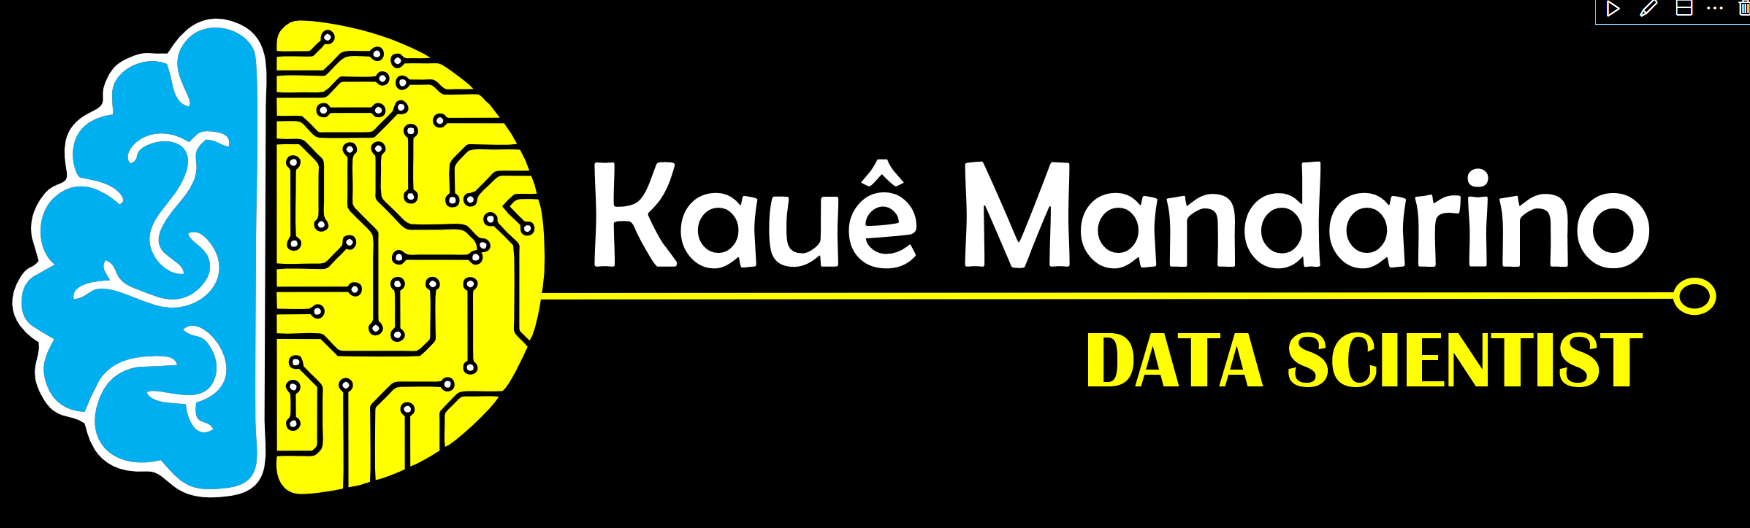

# Zimbra Data Extraction and Upload to SharePoint

This notebook automates the extraction of data received via email and sends it to a designated SharePoint/DataMarket destination.

## Logic Overview

Since a direct connection to the Zimbra server via IMAP was not possible, a **conditional forwarding** was configured in Zimbra to redirect relevant emails to a **Gmail account**, which offers better connectivity with Python libraries.

The script then:
- Connects to Gmail using IMAP
- Extracts relevant email content
- Processes and uploads the data to SharePoint

## Steps

1. Define variables and server settings  
   - All sensitive information (credentials, tokens, URLs) is handled securely using environment variables (`os.environ`).  
   - IMAP access is configured for Gmail, and the target SharePoint location is set.

2. Connect to the email server  
   - Accesses the inbox and filters emails based on business rules.

3. Process and upload data  
   - Extracted data is organized and uploaded to SharePoint in the appropriate location.

4. Automation  
   - The notebook is converted to a `.py` script and scheduled via **Windows Task Scheduler**.  
   - A `.bat` file is used as a trigger to execute the script automatically at defined intervals.

## Security

- No sensitive information is exposed in the source code.  
- All credentials are managed through environment variables to ensure security and compliance.


# Importing

In [ ]:
# Importing libraries:
import smtplib
import os
import imaplib
import email
from email import policy

In [ ]:
# Importing hidden authentication parameters
EMAIL = os.environ.get('email_zimbra')
PASSWORD = os.environ.get('senha_zimbra')

In [ ]:
import imaplib
import email
from email import policy
from datetime import datetime
import os

# Configurações do servidor IMAP do Zimbra
ZIMBRA_SERVER = 'imap.gmail.com'
ZIMBRA_PORT = 993

# Caminho para salvar os anexos
SAVE_PATH = r'C:\Users\Kaue Mandarino...Setor de Dados\Escriba FDL\DataWareHouse'

# Conectando ao servidor IMAP do Zimbra
mail = imaplib.IMAP4_SSL(ZIMBRA_SERVER, ZIMBRA_PORT)
mail.login(EMAIL, PASSWORD)

# Selecionando a caixa de entrada
mail.select('inbox')

# Obter a data de hoje no formato necessário
today = datetime.today().strftime('%d-%b-%Y')

# Pesquisando por e-mails não lidos recebidos hoje
status, email_ids = mail.search(None, f'(UNSEEN SENTSINCE {today})')
email_ids = email_ids[0].split()

# Iterando sobre os e-mails não lidos recebidos hoje
for email_id in email_ids:
    status, email_data = mail.fetch(email_id, '(RFC822)')
    raw_email = email_data[0][1]
    msg = email.message_from_bytes(raw_email, policy=policy.default)

    # Verificar se "Fábrica" está no título do e-mail
    if 'Fábrica' in msg['Subject']:
        # Extraindo informações do e-mail
        sender = msg['From']
        subject = msg['Subject']
        date = msg['Date']

        # Exibir informações do e-mail
        print(f"De: {sender}\nAssunto: {subject}\nData: {date}\n")

        # Iterar pelas partes do e-mail para encontrar anexos
        for part in msg.iter_attachments():
            filename = part.get_filename()
            if filename:
                # Definindo o caminho para salvar o anexo
                save_file_path = os.path.join(SAVE_PATH, filename)

                # Salvando o anexo no diretório especificado
                with open(save_file_path, 'wb') as f:
                    f.write(part.get_payload(decode=True))

# Fechando a conexão com o servidor IMAP
mail.close()
mail.logout()
''